# Food Delivery Visualization Analysis Open Source Project Notebook

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import pandas_profiling as pp
import matplotlib as plt
%matplotlib inline

In [2]:
# Load datasets
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

data = train.copy()

# preview dataset and its shape
print(data.shape, train.shape, test.shape)
data.head()

(11094, 9) (11094, 9) (2774, 8)


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [3]:
# check for unique values in each column
data.nunique()

Restaurant       7480
Location           35
Cuisines         2179
Average_Cost       26
Minimum_Order      18
Rating             33
Votes            1103
Reviews           761
Delivery_Time       7
dtype: int64

In [4]:
# Preview dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


## Data VIsualization

Objectives:
1. Delivery_Time (Target Variable): Determine Delivery Time of Restaurants (in minutes) with the Highest Frequency

2. Location (Feature): Determine the Top 5 Cities with the Highest Delivery Activities.

3. Cuisines (Feature): Determine the highest Cuisine Delivered by Restaurants in each City or ordered within each City

4. Average Cost(Feature): Determine the highest occuring amount paid on food delivery. Also, the City with the highest cost spent on Food Delivery

4. Ratings and Votes (Features): Determine the top 5 Locations with the highest Ratings and Votes.

### Delivery Time 

In [5]:
data.Delivery_Time.describe()

count          11094
unique             7
top       30 minutes
freq            7406
Name: Delivery_Time, dtype: object

In [6]:
# Convert ' minutes' in each column to empty string '' and also convert to integer
data['Delivery_Time'] = data['Delivery_Time'].str.replace(' minutes','')
data['Delivery_Time']=pd.to_numeric(data['Delivery_Time'])

Delivery Time Value Counts:
 30     7406
45     2665
65      923
120      62
20       20
80       14
10        4
Name: Delivery_Time, dtype: int64


[Text(0.5, 0, 'Delivery Time (Minutes)')]

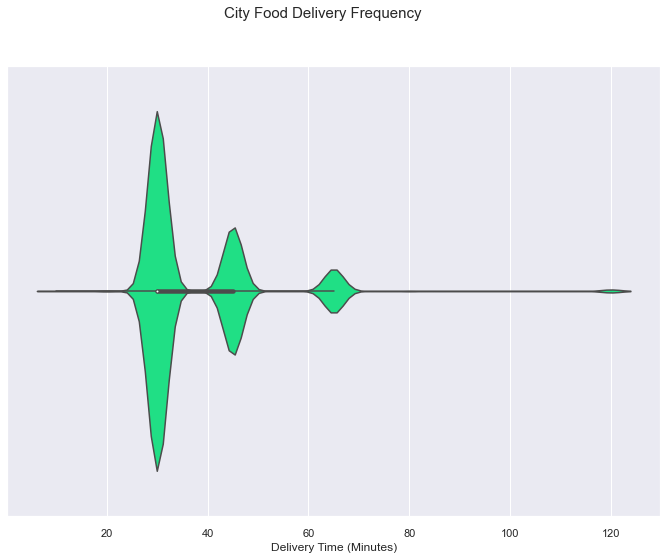

In [7]:
# preview  unique value counts of the Delivery Time periods
print('Delivery Time Value Counts:\n', data['Delivery_Time'].value_counts())

# set fig size
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# preview
d = sns.violinplot('Delivery_Time', data=data, palette='gist_rainbow_r')
plt.pyplot.suptitle('City Food Delivery Frequency',  fontsize=15)
d.set( xlabel='Delivery Time (Minutes)')

### Location

Noida          2086
Pune           1636
Mumbai         1229
Delhi          1153
Bangalore       947
Kolkata         546
Gurgoan         493
Timarpur        472
Whitefield      457
IndiaGate       411
Marathalli      366
Majestic        334
Maharashtra     307
Hyderabad       294
Gurgaon         260
Begumpet         81
Electronic       22
Name: City, dtype: int64


C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWi

[Text(0, 0, 'Noida'),
 Text(1, 0, 'Pune'),
 Text(2, 0, 'Mumbai'),
 Text(3, 0, 'Delhi'),
 Text(4, 0, 'Bangalore')]

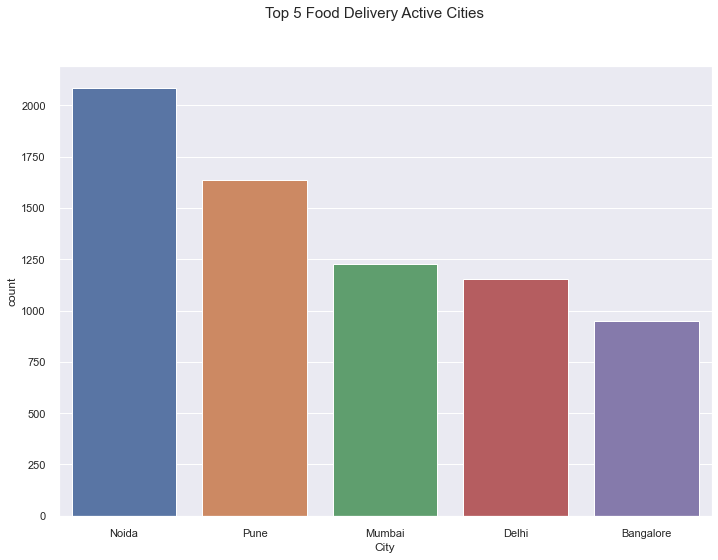

In [8]:
# Assing only second part of address containing City names to City and replace spaces to empty string
data['City'] = data.Location.str.rpartition(',')[2].str.replace(' ', '')

# Use only a single City text name for texts with other texts value
data['City'][data.City.str.contains('Pune')] = 'Pune'
data['City'][data.City.str.contains('Delhi')] = 'Delhi'
data['City'][data.City.str.contains('Mumbai')] = 'Mumbai'
data['City'][data.City.str.contains('Majestic')] = 'Majestic'
data['City'][data.City.str.contains('Electronic')] = 'Electronic'

# preview
print(data.City.value_counts())
City_sort = data.sort_values=('City')
c = sns.countplot(data=data, x='City', order=data.City.value_counts().head(5).index)
plt.pyplot.suptitle('Top 5 Food Delivery Active Cities',  fontsize=15)
c.set_xticklabels(c.get_xticklabels())

### Cuisines

In [9]:
# adjust Cuisine texts to be easily reitereatable
data['Cuisines'] = data['Cuisines'].str.lower()
data['Cuisines'] = data['Cuisines'].str.replace(' ','')

In [10]:
# group Cuisines into categories
fastfood = '|'.join(['fastfood','rolls','burger','wraps','streetfood','momos','sandwich','fingerfood','barfood','rawmeats','hotdogs','cafe','pizza'])
data['Cuisines'] = data['Cuisines'].str.replace(fastfood,"Fast Food")

desserts = '|'.join(['icecream','mithai','bakery','bubbletea','mishti','paan','frozenyogurt','desserts'])
data['Cuisines'] = data['Cuisines'].str.replace(desserts,"Desserts")

european = '|'.join(['healthyfood','salad','continental','european','italian','german','spanish','steak','mediterranean','brazilian','belgian','french','portuguese','african','greek'])
data['Cuisines'] = data['Cuisines'].str.replace(european,"Continental")

american = '|'.join(['mexican','bbq','roastchicken','charcoalchicken','tex-mex','southamerican','poké','american',])
data['Cuisines'] = data['Cuisines'].str.replace(american,"American")

MiddleEastern = '|'.join(['arabian', 'kebab', 'lebanese', 'afghan', 'iranian', 'middleeastern', 'turkish', 'israeli'])
data['Cuisines'] = data['Cuisines'].str.replace(MiddleEastern,"Middle Eastern")

Regional = '|'.join(['southIndian', 'southNorth Indian','hyderabadi', 'lucknowi','mughlai','biryani', 'bengali','kerala', 'bihari', 'Lucknowi', 'mangalorean', 'bangali', 'andhra', 'assamese', 'maharashtrian', 'chettinad', 'parsi', 'odia', 'tamil', 'northeastern', 'bohri', 'goan', 'gujarati', 'rajasthani', 'naga', 'awadhi', 'kashmiri', 'malwani'])
data['Cuisines'] = data['Cuisines'].str.replace(Regional,"South Indian")

SeaFood = '|'.join(['thai', 'konkan', 'srilankan', 'poke','seafood'])
data['Cuisines'] = data['Cuisines'].str.replace(SeaFood,"Sea Food")

Asian = '|'.join(['asian', 'indonesian', 'japanese', 'burmese', 'sushi', 'cantonese', 'tibetan', 'malaysian', 'vietnamese', 'korean', 'bangladeshi', 'nepalese'])
data['Cuisines'] = data['Cuisines'].str.replace(Asian,"Asian")

Beverages = '|'.join(['tea', 'juices', 'coffee','beverages'])
data['Cuisines'] = data['Cuisines'].str.replace(Beverages,"Beverages")

Biryani = '|'.join(['chinese'])
data['Cuisines'] = data['Cuisines'].str.replace(Biryani,"Chinese")

NorthIndian = '|'.join(['indian', 'modernindian', 'modernnorthindian', 'northindian', 'northnorthindian'])
data['Cuisines'] = data['Cuisines'].str.replace(NorthIndian,"North Indian")

HealthyFood = '|'.join(['salad'])
data['Cuisines'] = data['Cuisines'].str.replace(HealthyFood,"Healthy Food")

In [11]:
# display Cuisine count in each category

Cuisines_list = data['Cuisines'].str.split(',')
Cuisines_counter = Counter(([a for b in Cuisines_list.tolist() for a in b]))
Cuisines_counter

Counter({'Fast Food': 6381,
         'Continental': 1816,
         'Desserts': 2733,
         'South Indian': 2481,
         'North Indian': 4820,
         'Chinese': 3459,
         'Beverages': 1697,
         'southNorth Indian': 1196,
         'Sea Food': 378,
         'Asian': 429,
         'American': 332,
         'Middle Eastern': 367})

In [12]:
Cuisines_C = pd.DataFrame.from_dict(Cuisines_counter, orient='index', columns=['counts']).reset_index()
Cuisines_C = Cuisines_C.sort_values('counts')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'American'),
  Text(1, 0, 'Middle Eastern'),
  Text(2, 0, 'Sea Food'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'southNorth Indian'),
  Text(5, 0, 'Beverages'),
  Text(6, 0, 'Continental'),
  Text(7, 0, 'South Indian'),
  Text(8, 0, 'Desserts'),
  Text(9, 0, 'Chinese'),
  Text(10, 0, 'North Indian'),
  Text(11, 0, 'Fast Food')])

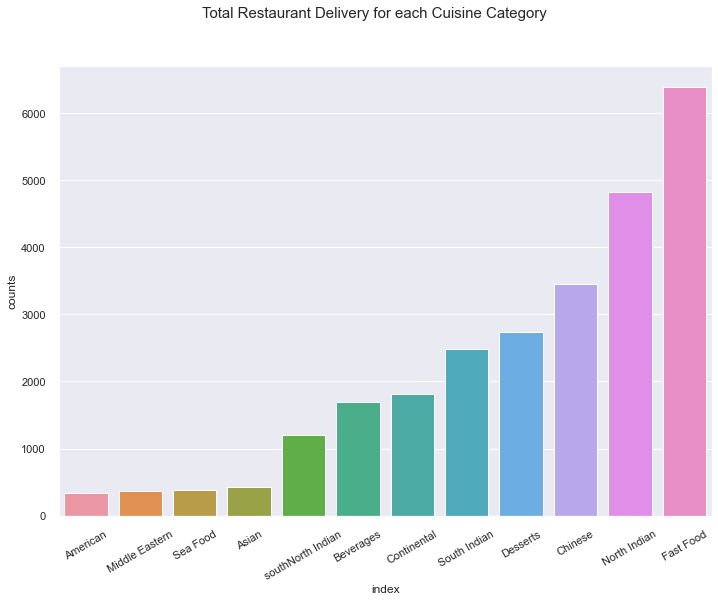

In [13]:
# Preview Histogram the Cuisine categories
sns.barplot(x='index', y='counts', data=Cuisines_C)
plt.pyplot.suptitle('Total Restaurant Delivery for each Cuisine Category', fontsize=15)
plt.pyplot.xticks(rotation=30)

### Average Cost

In [14]:
# Create Location_df containing correct measurable values for the columns
Location_df = data[['City', 'Average_Cost' ,'Minimum_Order' ,'Rating', 'Votes', 'Reviews']]

# Average_Cost to numeric values
Location_df['Average_Cost'] = Location_df['Average_Cost'].str.replace("[^0-9]","")
Location_df['Average_Cost'] = Location_df['Average_Cost'].str.strip()
Location_df['Average_Cost']=pd.to_numeric(Location_df['Average_Cost'])
Location_df.Average_Cost.fillna(200, inplace=True)
data['Average_Cost'] = data['Average_Cost'].str.replace("for","₹200") #filled with the max value for plotting

# Minimum_Cost to numeric values
Location_df['Minimum_Order'] = Location_df['Minimum_Order'].str.replace("[^0-9]","")
Location_df['Minimum_Order'] = Location_df['Minimum_Order'].str.strip()
Location_df['Minimum_Order']=pd.to_numeric(Location_df['Minimum_Order'])

# Rating to Object values and non-reated movies to value of 0
Location_df.Rating = Location_df.Rating.replace("NEW",np.nan)
Location_df.Rating = Location_df.Rating.replace("-",np.nan)
Location_df.Rating = Location_df.Rating.replace("Opening Soon",np.nan)
Location_df.Rating = Location_df.Rating.replace("Temporarily Closed",np.nan)
Location_df.Rating = Location_df.Rating.astype('float')
Location_df.Rating.fillna(0, inplace=True)

# Votes to Object values and non votes to value of 0
Location_df.Votes = Location_df.Votes.replace("-",np.nan)
Location_df.Votes = Location_df.Votes.astype('float')
Location_df.Votes.fillna(0, inplace=True)

# Reviews to Object values and non Reviews to value of 0
Location_df.Reviews = Location_df.Reviews.replace("-",np.nan)
Location_df.Reviews = Location_df.Reviews.astype('float')
Location_df.Reviews.fillna(0, inplace=True)


C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [15]:
Location_df.head()

,City,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,Pune,200.0,50,3.5,12.0,4.0
1,Marathalli,100.0,50,3.5,11.0,4.0
2,Mumbai,150.0,50,3.6,99.0,30.0
3,Noida,250.0,99,3.7,176.0,95.0
4,Whitefield,200.0,99,3.2,521.0,235.0


#### Average_Cost

Top 5 Average cost of Cuisines price paid at Restaurants 
 ₹300     537
₹250     881
₹150    2462
₹100    2557
₹200    3242
Name: Average_Cost, dtype: int64


[Text(0.5, 0, 'No of Occurences'), Text(0, 0.5, 'Amount Paid')]

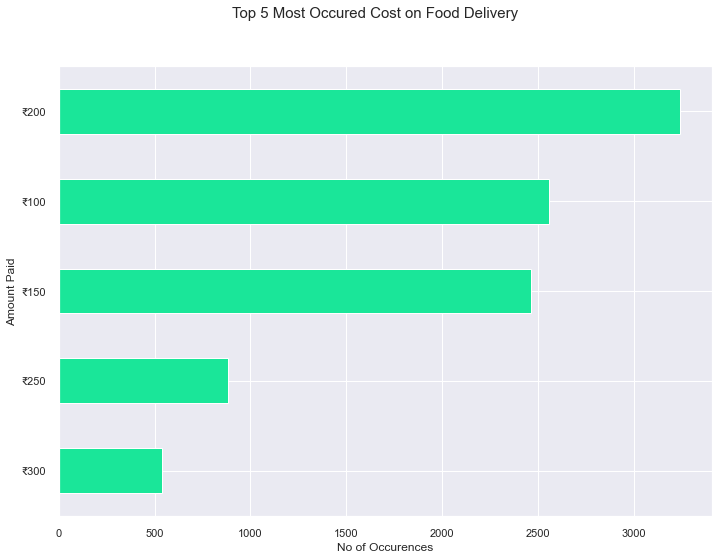

In [16]:
# Preview Maximum Amount of Average cost spent
print('Top 5 Average cost of Cuisines price paid at Restaurants \n', data.Average_Cost.value_counts().sort_values().tail(5))
ac = data.Average_Cost.value_counts().sort_values().tail(5).plot(kind = 'barh',color=(0.1, 0.9, 0.6))
plt.pyplot.suptitle('Top 5 Most Occured Cost on Food Delivery', fontsize=15)
ac.set(xlabel='No of Occurences', ylabel='Amount Paid')

         City  Average_Cost
0   Bangalore      185350.0
2       Delhi      210700.0
12     Mumbai      263150.0
14       Pune      354700.0
13      Noida      427200.0


Text(0.5, 0.98, 'Total Average Cost of Cuisines in each Location')

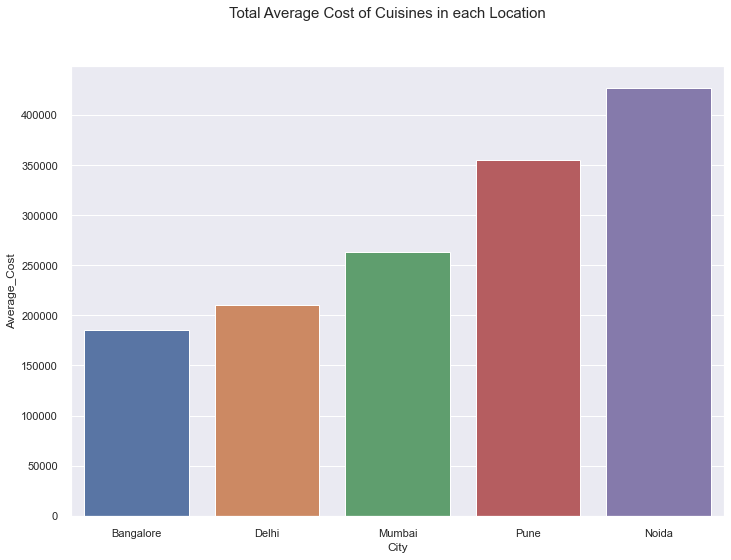

In [17]:
# Determine top 5 cities with the highest average cost on food delivery
Av_Cost = Location_df.groupby(['City']).sum()
Av_Cost = Av_Cost.reset_index()
Av_Cost = Av_Cost.sort_values('Average_Cost').tail(5)
Av_Cost = Av_Cost[['City', 'Average_Cost']]
# Plot Preview top 5 cities
print(Av_Cost)
sns.barplot(x='City', y='Average_Cost', data=Av_Cost)
plt.pyplot.suptitle('Total Average Cost of Cuisines in each Location', fontsize=15)

### Vote and Review 

In [18]:
# Preview Location_df
Location_df.head()

,City,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,Pune,200.0,50,3.5,12.0,4.0
1,Marathalli,100.0,50,3.5,11.0,4.0
2,Mumbai,150.0,50,3.6,99.0,30.0
3,Noida,250.0,99,3.7,176.0,95.0
4,Whitefield,200.0,99,3.2,521.0,235.0


#### Rating

In [19]:
# Select Location with Restaurants Delivery Rating higher than 4.0
Rank_df = Location_df.loc[Location_df['Rating'] > 4].reset_index()
Rank_df.head()

,index,City,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,11,Maharashtra,800.0,50,4.2,1693.0,1239.0
1,35,Noida,600.0,50,4.7,914.0,499.0
2,41,Mumbai,150.0,50,4.1,806.0,513.0
3,62,Maharashtra,600.0,50,4.6,391.0,174.0
4,70,Whitefield,300.0,50,4.1,119.0,59.0


         City  counts
2       Delhi      93
12     Mumbai      99
0   Bangalore     155
13      Noida     226
14       Pune     228


[Text(0, 0.5, 'Ratings Count')]

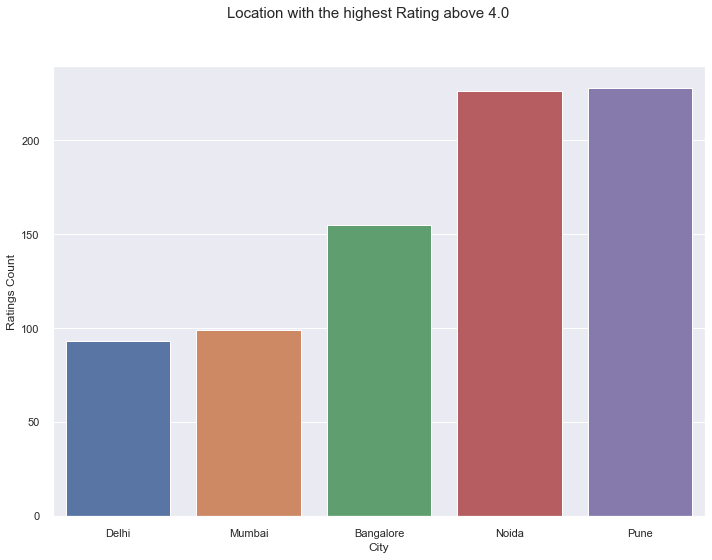

In [20]:
# Create Rating dataframe along with total ratings in each city
Rank = Rank_df.groupby(['Rating','City',]).size().reset_index()
Rank.sort_values(0)
Rank = Rank.groupby(['City']).sum().reset_index()
Rank = Rank.rename(columns = {0: 'counts'}, inplace=False)
Rat = Rank[['City','counts']].sort_values('counts').tail(5)
print(Rat)

# Plot Preview Rating
r = sns.barplot(x='City', y='counts', data=Rat)
plt.pyplot.suptitle('Location with the highest Rating above 4.0', fontsize=15)
r.set(ylabel='Ratings Count')

#### Votes

Top 5 Restaurants Votes per City 
             City   Votes
1391   IndiaGate  7062.0
1891    Majestic  7135.0
337    Bangalore  7661.0
2045  Marathalli  9054.0
3585  Whitefield  9054.0


[Text(0, 0.5, 'Votes Count')]

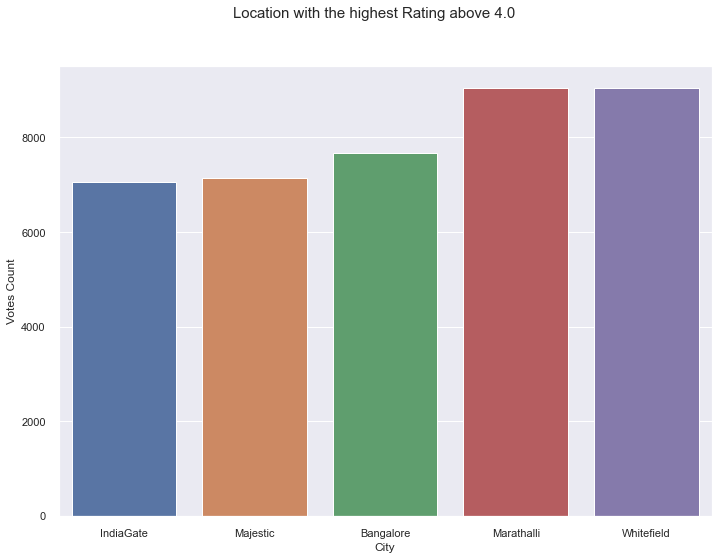

In [21]:
# Create Vote_Rank with the total votes per city
Vote_Rank = Location_df.groupby(['City', 'Votes']).size().reset_index()
Vote_Rank.groupby(['City']).sum().reset_index()

Vat = Vote_Rank[['City','Votes']].sort_values('Votes').tail(5)
print('Top 5 Restaurants Votes per City \n',Vat)

# Plot Preview Votes per City
v = sns.barplot(x='City', y='Votes', data=Vat)
plt.pyplot.suptitle('Location with the highest Rating above 4.0', fontsize=15)
v.set(ylabel='Votes Count')